In [21]:
import seaborn as sn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# dirks csv파일 로드
# beer_serving, spirit_serving, wine_serving, total_litres_of_pure_alcohol
# 행렬 히트맵 시각화
# 국가별 술 소비량 대비 알콜비율 컬럼 추가
# 국가별 순위 시각화 하여 출력

In [24]:
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS


In [25]:
# 상관계수 행렬 생성

corr = drinks[["beer_servings", 
                "spirit_servings",
                 "wine_servings", 
                 "total_litres_of_pure_alcohol"]].corr(method="pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


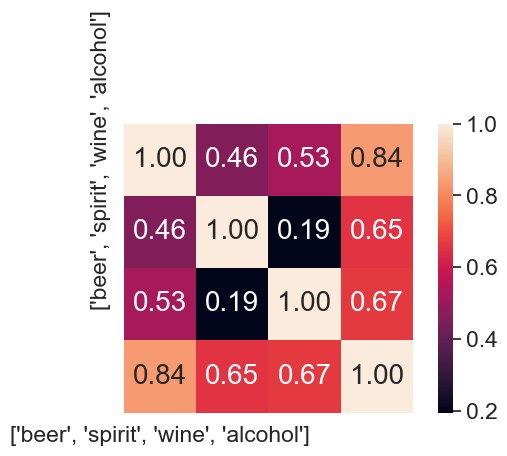

In [26]:
# 시각화 

cols_view = [["beer", "spirit", "wine", "alcohol"]]
sn.set(font_scale=1.5)

hm = sn.heatmap(  
    corr.values,
    cbar = True,
    annot = True,
    square = True,
    fmt = ".2f",
    annot_kws= {"size":20},
    xticklabels=cols_view,
    yticklabels=cols_view    
    )

plt.tight_layout()
plt.show()


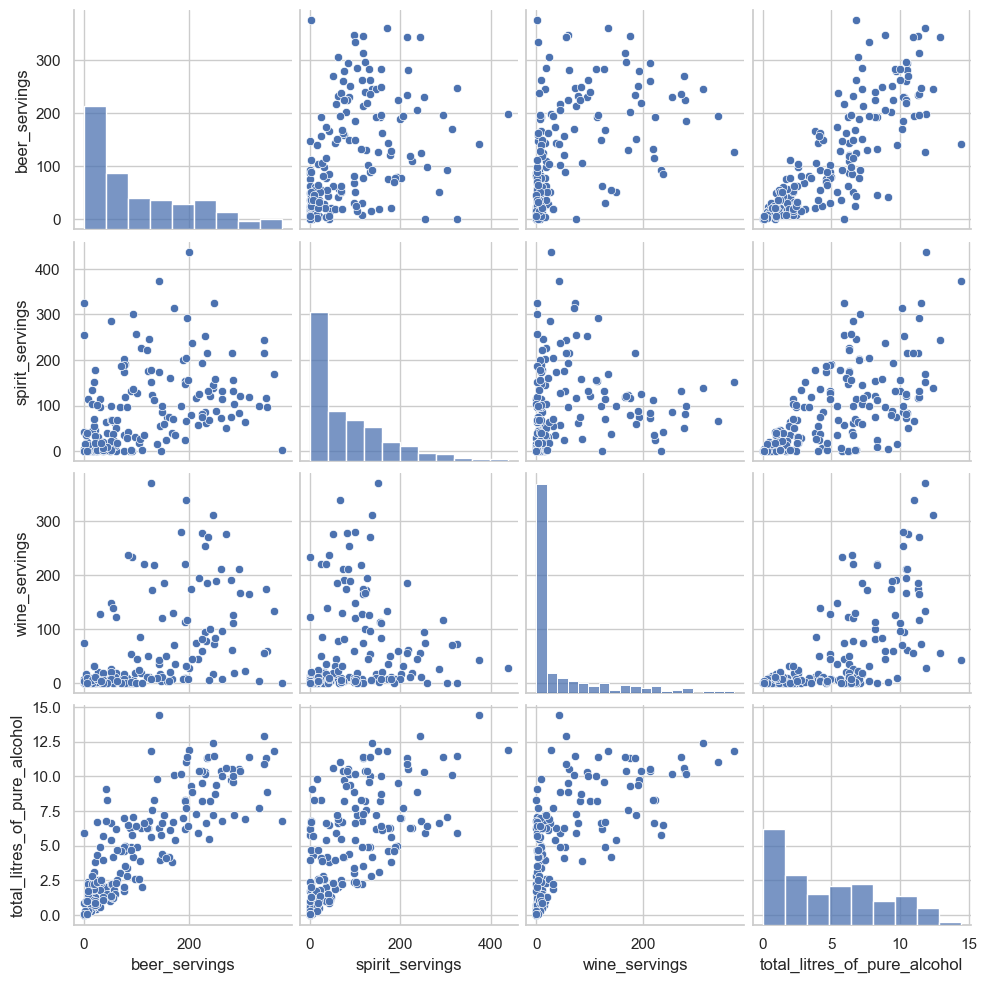

In [27]:
sn.set(style = "whitegrid", context = "notebook")
sn.pairplot(drinks[["beer_servings", 
                "spirit_servings",
                 "wine_servings", 
                 "total_litres_of_pure_alcohol"]],
                 height=2.5)

plt.show()

In [28]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [29]:
# 파생변수 생성
# 총 술의 소비량 total_serving = beer + spirit + wine 결측치데이터 0으로 대체
# 술의 소비량 대비 알콜 비율 파생변수 생성 alcohol_rate = total_litres... /total_serving
# 나라별 독한 술 먹는 나라의 순위
# 우리나라의 순위 확인
# 시각화    

In [30]:
drinks["total_serving"] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"]
drinks["total_serving"]

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: total_serving, Length: 193, dtype: int64

In [31]:
drinks["total_serving"].fillna(0)

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Name: total_serving, Length: 193, dtype: int64

In [32]:
drinks["total_serving"].isna().sum()

0

In [33]:
drinks["alcohol_rate"] =  drinks["total_litres_of_pure_alcohol"] / drinks["total_serving"]
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)

In [43]:
group_drinks = drinks.groupby("country").sum()
group_drinks.head(5)


C:\Users\이주노\AppData\Local\Temp\ipykernel_46728\2759075806.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_drinks = drinks.groupby("country").sum()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_serving,alcohol_rate
country,,,,,,
Afghanistan,0,0,0,0.0,0,0.000000
Albania,89,132,54,4.9,275,0.017818
Algeria,25,0,14,0.7,39,0.017949
Andorra,245,138,312,12.4,695,0.017842
Angola,217,57,45,5.9,319,0.018495


In [42]:
drinks_rank = drinks.sort_values("alcohol_rate",ascending=False)
drinks_rank.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_serving,alcohol_rate
63,Gambia,8,0,1,2.4,AF,9,0.266667


In [46]:
drinks_rank =drinks_rank.loc[:,["country", "alcohol_rate"]]

In [47]:
drinks_rank.reset_index(drop=False, inplace=True)


In [55]:
drinks_rank[drinks_rank["country"] == "South Korea"].index + 1

Int64Index([15], dtype='int64')

In [56]:
drinks.sort_values("alcohol_rate",ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_serving,alcohol_rate
63,Gambia,8,0,1,2.4,AF,9,0.266667
153,Sierra Leone,25,3,2,6.7,AF,30,0.223333
124,Nigeria,42,5,2,9.1,AF,49,0.185714
179,Uganda,45,9,0,8.3,AF,54,0.153704
142,Rwanda,43,2,0,6.8,AF,45,0.151111
...,...,...,...,...,...,...,...,...
103,Maldives,0,0,0,0.0,AS,0,0.000000
97,Libya,0,0,0,0.0,AF,0,0.000000
79,Iran,0,0,0,0.0,AS,0,0.000000
90,Kuwait,0,0,0,0.0,AS,0,0.000000


In [36]:
group_drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

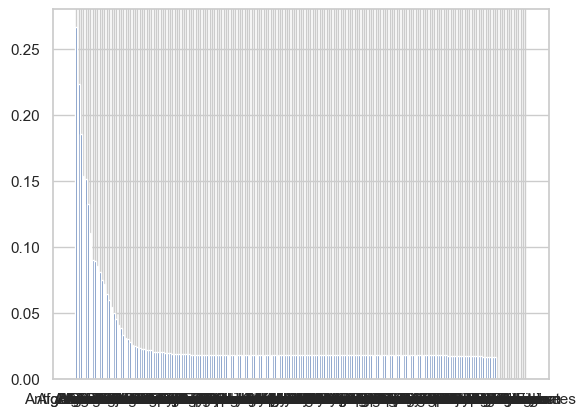

In [37]:
plt.bar(group_drinks.index,group_drinks["alcohol_rate"].sort_values(ascending=False))
plt.show()

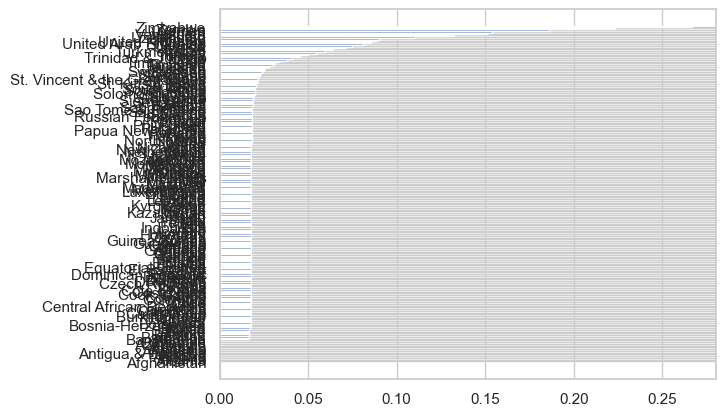

In [38]:
plt.barh(group_drinks.index,group_drinks["alcohol_rate"].sort_values())
plt.show()

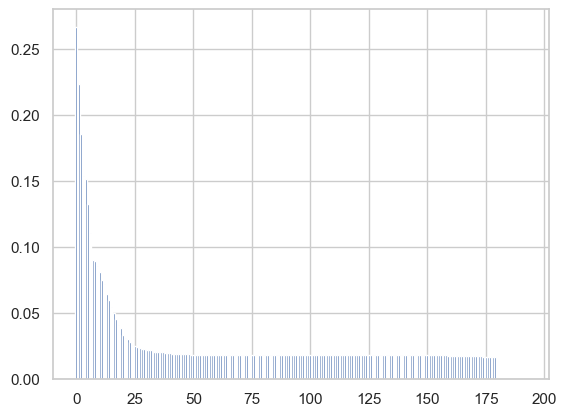

In [57]:
plt.bar(drinks_rank.index,group_drinks["alcohol_rate"].sort_values(ascending=False))
plt.show()

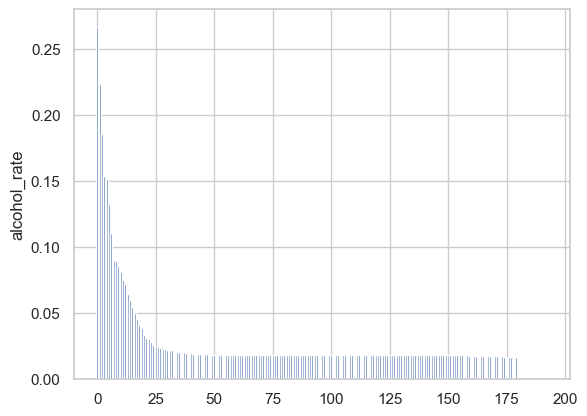

In [64]:
x = np.arange(len(drinks_rank))
y = group_drinks["alcohol_rate"].sort_values(ascending=False)


plt.bar(x,y)
plt.ylabel("alcohol_rate")
plt.show()

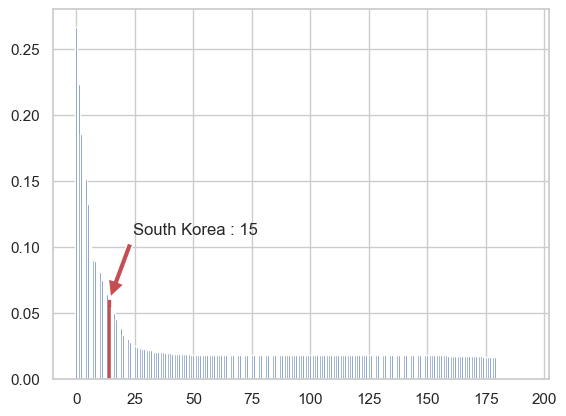

In [73]:
# 국가리스트 생성

country_list = drinks_rank["country"].tolist()

bar_list = plt.bar(x,y)

# 그래프를 커스텀


bar_list[country_list.index("South Korea")].set_color("r")

Korea_rank = country_list.index("South Korea")
Korea_alcohol_rate = drinks_rank[drinks_rank["country"] == "South Korea"]\
    ["alcohol_rate"].values[0]


plt.annotate("South Korea : " + str(Korea_rank + 1), xy = (Korea_rank, Korea_alcohol_rate
                ), xytext=(Korea_rank+10, Korea_alcohol_rate+0.05), arrowprops=dict
                (facecolor ="r", shrink = 0.05 ))

plt.show()